In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [ ]:
data.head()

In [79]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev= data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape


In [80]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1= W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1 
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0 
    
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/ m * dZ2.dot(A1.T)
    db2 = 1/ m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1- alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2
    

In [81]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size 

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2 ,W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 10 == 0):
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2 

In [82]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 100, 0.1)

Iteration:  0
[7 1 1 ... 5 5 5] [1 7 5 ... 1 3 8]
0.13221951219512196
Iteration:  10
[7 1 4 ... 1 1 5] [1 7 5 ... 1 3 8]
0.23814634146341462
Iteration:  20
[7 7 2 ... 1 7 1] [1 7 5 ... 1 3 8]
0.2950731707317073
Iteration:  30
[7 7 2 ... 1 7 1] [1 7 5 ... 1 3 8]
0.34143902439024393
Iteration:  40
[1 7 4 ... 1 7 1] [1 7 5 ... 1 3 8]
0.3893170731707317
Iteration:  50
[1 7 4 ... 1 7 1] [1 7 5 ... 1 3 8]
0.4330487804878049
Iteration:  60
[1 7 4 ... 1 1 1] [1 7 5 ... 1 3 8]
0.4709024390243902
Iteration:  70
[1 7 4 ... 1 5 1] [1 7 5 ... 1 3 8]
0.5035121951219512
Iteration:  80
[1 7 4 ... 1 3 1] [1 7 5 ... 1 3 8]
0.5311219512195122
Iteration:  90
[1 7 4 ... 1 3 1] [1 7 5 ... 1 3 8]
0.5559756097560976


In [95]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index,  None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Predictions: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()
    

Predictions:  [1]
Label:  1


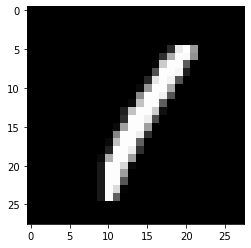

Predictions:  [7]
Label:  7


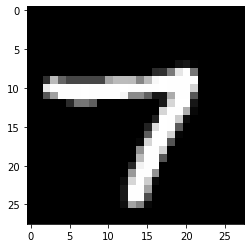

Predictions:  [4]
Label:  5


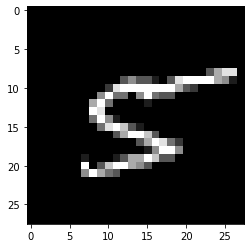

Predictions:  [8]
Label:  8


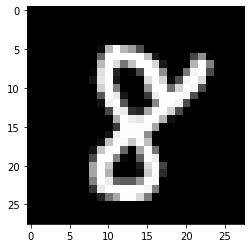

In [96]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [98]:
#accuracy test
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 9 7 0 9 0 8 1 4 5 0 0 6 0 9 3 7 7 6 8 4 0 1 7 6 6 9 6 4 4 8 9 4 0 0 8 7
 6 6 1 3 2 7 1 8 3 0 3 5 6 4 5 4 0 4 7 9 8 4 1 0 8 9 9 5 1 8 0 8 9 6 7 9 4
 6 6 6 6 8 3 7 5 8 4 7 8 1 8 1 6 4 5 6 8 3 9 7 5 3 4 4 6 9 7 4 4 4 8 2 1 4
 5 6 7 0 3 3 0 8 5 7 6 7 0 0 4 0 5 8 4 6 1 6 5 0 4 1 7 9 8 1 7 7 6 6 0 1 0
 7 9 8 1 4 4 8 8 1 3 4 6 5 9 4 3 5 7 3 7 4 5 0 1 1 8 0 6 1 5 9 9 6 4 7 8 1
 4 1 3 0 1 6 7 8 1 9 4 4 9 1 8 7 6 6 0 6 6 9 0 0 9 6 0 9 1 0 9 5 8 9 2 8 9
 8 6 0 3 8 3 1 6 7 7 7 2 9 5 9 1 0 7 7 9 7 4 7 7 1 6 3 6 0 6 9 9 5 7 0 5 5
 8 4 7 0 4 6 4 8 6 7 1 9 0 8 1 5 8 1 1 9 6 1 9 5 1 0 8 2 6 8 3 0 0 2 0 1 6
 1 0 0 1 6 0 4 7 1 8 5 4 1 9 3 2 1 1 1 0 5 1 0 1 1 0 5 4 9 1 0 6 2 0 4 7 3
 0 7 8 8 8 4 0 3 8 4 8 1 9 7 0 0 2 5 6 0 1 2 4 8 3 3 4 7 3 6 5 0 4 6 4 0 0
 9 3 4 1 0 9 7 7 7 7 8 4 1 6 8 4 4 8 0 5 5 0 4 3 6 0 4 9 6 8 7 5 6 0 7 8 8
 1 4 1 6 4 4 2 8 7 7 9 1 0 9 8 6 0 0 7 8 4 7 7 6 1 4 7 7 8 9 0 1 4 7 9 0 1
 6 4 8 1 4 6 0 0 3 4 2 6 0 7 9 4 0 0 1 8 3 1 1 5 5 1 0 8 8 3 6 3 7 6 1 5 9
 6 9 4 1 1 9 6 1 1 5 0 2 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


0.535